In [2]:
import pandas as pd
import ast

# Sample data - Replace with your dataframe
df = pd.read_csv("macro_global_cleaned_ht.csv")

# Function to process hashtag dictionaries
def process_hashtags(hashtags_dict):
    if isinstance(hashtags_dict, str):  # If the column is stored as string, evaluate it
        hashtags_dict = ast.literal_eval(hashtags_dict)
    if isinstance(hashtags_dict, dict):
        return len(hashtags_dict), sum(hashtags_dict.values())  # Return count and sum of values
    return 0, 0  # Return 0 if not a valid dictionary or it's empty

# Apply the function to create new columns: one for count and one for sum
df[['Hashtags_Count', 'Hashtags_Sum']] = df['Hashtags_(dictionary)'].apply(lambda x: pd.Series(process_hashtags(x)))

# View the result
print(df)


     Followers  Average_Likes  Average_Comments  Average_Engagement_Rate  \
0       218468        6260.41             65.48                   2.8997   
1       165436         313.86              4.71                   0.1926   
2       179537        1005.04             11.01                   0.5659   
3       948482       21008.08            803.88                   2.2997   
4       123017        6343.21             43.83                   5.1920   
..         ...            ...               ...                      ...   
133     681344       21513.17            392.23                   3.2150   
134     220351        4204.33             43.67                   1.9278   
135     452619       11435.49             93.53                   2.5472   
136     170325       31037.03            409.90                  18.4629   
137     106343        7593.50            121.86                   7.2552   

     Engagement_Rate_(60_Days)  Posting_frequency_(last_60_days)  \
0                  

In [3]:
# Assuming you have other features and a target variable
X = df.drop(['Average_Engagement_Rate', 'Hashtags_(dictionary)'], axis=1)  # Add other numerical features
y = df['Average_Engagement_Rate']

# Fill missing values if necessary
X = X.fillna(0)
y = y.fillna(0)

# Continue with training the model


In [ ]:
# First: Model without hashtags
X_no_hashtags = X.drop(['Hashtags_Count', 'Hashtags_Sum'], axis=1)  # Remove hashtags features

# Split data again
X_train, X_test, y_train, y_test = train_test_split(X_no_hashtags, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)
y_pred_no_hashtags = model.predict(X_test)

# Print performance metrics without hashtags
print('Without Hashtags:')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_no_hashtags)}')
print(f'R-squared: {r2_score(y_test, y_pred_no_hashtags)}')

# Second: Model with hashtags
X_with_hashtags = X  # Includes Hashtags_Count and Hashtags_Sum

# Split data again
X_train, X_test, y_train, y_test = train_test_split(X_with_hashtags, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)
y_pred_with_hashtags = model.predict(X_test)

# Print performance metrics with hashtags
print('With Hashtags:')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_with_hashtags)}')
print(f'R-squared: {r2_score(y_test, y_pred_with_hashtags)}')

# Optionally, plot to compare
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_with_hashtags, color='blue', alpha=0.7, label='With Hashtags')
plt.scatter(y_test, y_pred_no_hashtags, color='orange', alpha=0.7, label='Without Hashtags')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'With Hashtags R²: {r2_score(y_test, y_pred_with_hashtags):.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))
plt.text(0.05, 0.90, f'Without Hashtags R²: {r2_score(y_test, y_pred_no_hashtags):.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate')
plt.xlabel('Actual Engagement Rate')
plt.ylabel('Predicted Engagement Rate')

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()


Without Hashtags:
Mean Squared Error: 33.4470592449258
R-squared: 0.6949066356938748
With Hashtags:
Mean Squared Error: 31.181536392313472
R-squared: 0.7155720097094025


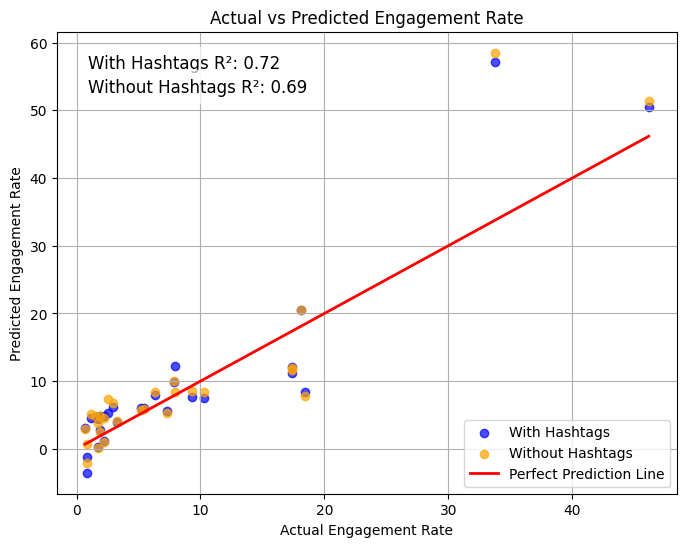

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is named `df`
# You should replace this with the actual loading of your dataset

import pandas as pd
import numpy as np

# Assuming df is your DataFrame and the column with hashtags is named 'Hashtags'
def process_hashtags(hashtags_column):
    # Convert the string representation of the dictionary into an actual dictionary
    hashtags_column = hashtags_column.apply(eval)  # Only if it's a string representation of a dictionary
    
    # Now, we want to extract features from these dictionaries
    # Option 1: Count the number of unique hashtags (length of the dictionary)
    hashtags_column = hashtags_column.apply(lambda x: len(x) if isinstance(x, dict) else 0)
    
    # Option 2: Sum the frequencies of the hashtags (sum of the values in the dictionary)
    # hashtags_column = hashtags_column.apply(lambda x: sum(x.values()) if isinstance(x, dict) else 0)
    
    return hashtags_column

# Apply this function to process the hashtags column in your DataFrame
df['Hashtags_Count'] = process_hashtags(df['Hashtags_(dictionary)'])

# Now, drop the original 'Hashtags' column if necessary
df = df.drop(columns=['Hashtags_(dictionary)'])


# Continue with the model training process as before

# Drop 'Average_Engagement_Rate' from features to create independent variables
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# First: Model without hashtags
X_no_hashtags = X.drop(['Hashtags_Count', 'Hashtags_Sum'], axis=1)  # Remove hashtags features

# Split data for the model without hashtags
X_train, X_test, y_train, y_test = train_test_split(X_no_hashtags, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model without hashtags
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_no_hashtags = model.predict(X_test)

# Print performance metrics without hashtags
print('Without Hashtags:')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_no_hashtags)}')
print(f'R-squared: {r2_score(y_test, y_pred_no_hashtags)}')

# Second: Model with hashtags
X_with_hashtags = X  # Includes Hashtags_Count and Hashtags_Sum

# Split data for the model with hashtags
X_train, X_test, y_train, y_test = train_test_split(X_with_hashtags, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model with hashtags
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_with_hashtags = model.predict(X_test)

# Print performance metrics with hashtags
print('With Hashtags:')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_with_hashtags)}')
print(f'R-squared: {r2_score(y_test, y_pred_with_hashtags)}')

# Optionally, plot to compare the performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_with_hashtags, color='blue', alpha=0.7, label='With Hashtags')
plt.scatter(y_test, y_pred_no_hashtags, color='orange', alpha=0.7, label='Without Hashtags')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'With Hashtags R²: {r2_score(y_test, y_pred_with_hashtags):.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))
plt.text(0.05, 0.90, f'Without Hashtags R²: {r2_score(y_test, y_pred_no_hashtags):.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Check the column names in your DataFrame
print(df.columns)


Index(['Followers', 'Average_Likes', 'Average_Comments',
       'Average_Engagement_Rate', 'Engagement_Rate_(60_Days)',
       'Posting_frequency_(last_60_days)', 'Posts_(image)', 'Posts_(videos)',
       'Posts_(carousel)', 'Average_Hashtags_/_Post_(60_Days)',
       'Hashtags_(dictionary)', 'Hashtags_Count', 'Hashtags_Sum'],
      dtype='object')
